# Data Wrangling Project Fall 2024
Sidda Patel & Mary Dorenbos

### This notebook houses project work for the BAIS 3250 Data Wrangling Project. We decided to scrape from the IMDB website on movie characteristics and derive some valuable outputs by merging this data with a kaggle datatset on movies from IMDB. Below are the links to each website.

IMDB website: https://www.imdb.com/list/ls055294306/ 
Kaggle dataset: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows?select=imdb_top_1000.csv 

Loading in the csvs, and loading in pandas, matplot, and numpy

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Importing the Kaggle datatset CSV
imdb_kaggle = pd.read_csv('imdb_top_1000.csv', sep = ',', encoding = 'utf-8')
display(imdb_kaggle)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [7]:
# importing the csv of scraped data from the IMDB website
imdb_scraped = pd.read_csv('scraped_imdb_raw.csv', sep = ',', encoding = 'utf-8')
imdb_scraped = imdb_scraped.drop(columns=['URL', 'Content Rating'])
display(imdb_scraped)

,Title,Duration (mins),Genre,Rating,Vote Count
0,The Dark Knight,152,"Action, Crime, Drama",9.0,2947590
1,Schindler&apos;s List,195,"Biography, Drama, History",9.0,1487411
2,The Lord of the Rings: The Return of the King,201,"Action, Adventure, Drama",9.0,2030566
3,Se7en,127,"Crime, Drama, Mystery",8.6,1853916
4,Braveheart,178,"Biography, Drama, War",8.3,1110604
...,...,...,...,...,...
87,Persona,83,"Drama, Thriller",8.0,133641
88,Andrey Rublyov,189,"Biography, Drama, History",8.0,58032
89,Spartacus,197,"Adventure, Biography, Drama",7.9,145822
90,Le trou,131,"Crime, Drama, Thriller",8.5,21152


In [8]:


# Data Cleaning and Preprocessing
# Standardizing column names for consistency
imdb_kaggle.rename(columns={
    'Series_Title': 'Title',
    'Runtime': 'Duration (mins)',
    'Certificate': 'Content Rating',
    'IMDB_Rating': 'Rating',
    'No_of_Votes': 'Vote Count'
}, inplace=True)

# Standardizing data formats
# Convert 'Runtime' to integer format in both DataFrames

imdb_kaggle['Duration (mins)'] = imdb_kaggle['Duration (mins)'].str.replace(' min', '').astype(float)
imdb_scraped['Duration (mins)'] = imdb_scraped['Duration (mins)'].astype(float)

In [9]:
# Specify the columns you want to keep 
columns_to_keep = ['Title', 'Duration (mins)', 'Genre', 'Rating', 'Vote Count'] 
# Create a new DataFrame with only the specified columns 
imdb_kaggle = imdb_kaggle[columns_to_keep] 
imdb_kaggle.dtypes

Title               object
Duration (mins)    float64
Genre               object
Rating             float64
Vote Count           int64
dtype: object

In [10]:
imdb_scraped.dtypes

Title               object
Duration (mins)    float64
Genre               object
Rating             float64
Vote Count           int64
dtype: object

In [11]:
merged_df = pd.concat([imdb_kaggle, imdb_scraped], ignore_index=True)
merged_df

,Title,Duration (mins),Genre,Rating,Vote Count
0,The Shawshank Redemption,142.0,Drama,9.3,2343110
1,The Godfather,175.0,"Crime, Drama",9.2,1620367
2,The Dark Knight,152.0,"Action, Crime, Drama",9.0,2303232
3,The Godfather: Part II,202.0,"Crime, Drama",9.0,1129952
4,12 Angry Men,96.0,"Crime, Drama",9.0,689845
...,...,...,...,...,...
1087,Persona,83.0,"Drama, Thriller",8.0,133641
1088,Andrey Rublyov,189.0,"Biography, Drama, History",8.0,58032
1089,Spartacus,197.0,"Adventure, Biography, Drama",7.9,145822
1090,Le trou,131.0,"Crime, Drama, Thriller",8.5,21152


In [12]:
# check for duplicate movies
duplicates = merged_df.duplicated()
print(merged_df[duplicates])

Empty DataFrame
Columns: [Title, Duration (mins), Genre, Rating, Vote Count]
Index: []


In [13]:
# checking for duplicates
duplicate_titles = merged_df[merged_df.duplicated(subset=['Title'], keep=False)]
duplicate_titles
# dropping duplicates
merged_df.drop_duplicates(subset='Title', keep='first', inplace=True)
merged_df

,Title,Duration (mins),Genre,Rating,Vote Count
0,The Shawshank Redemption,142.0,Drama,9.3,2343110
1,The Godfather,175.0,"Crime, Drama",9.2,1620367
2,The Dark Knight,152.0,"Action, Crime, Drama",9.0,2303232
3,The Godfather: Part II,202.0,"Crime, Drama",9.0,1129952
4,12 Angry Men,96.0,"Crime, Drama",9.0,689845
...,...,...,...,...,...
1084,Die Hard with a Vengeance,128.0,"Action, Adventure, Thriller",7.6,414203
1085,Ging chaat goo si,100.0,"Action, Comedy, Crime",7.5,43329
1086,The Godfather Part II,202.0,"Crime, Drama",9.0,1396788
1088,Andrey Rublyov,189.0,"Biography, Drama, History",8.0,58032


In [14]:
# cleaning the genre column to only keep the first genre listed in each row
def first_genre(genres): 
    return genres.split(',')[0].strip() 
merged_df['Genre'] = merged_df['Genre'].apply(first_genre) 
merged_df

,Title,Duration (mins),Genre,Rating,Vote Count
0,The Shawshank Redemption,142.0,Drama,9.3,2343110
1,The Godfather,175.0,Crime,9.2,1620367
2,The Dark Knight,152.0,Action,9.0,2303232
3,The Godfather: Part II,202.0,Crime,9.0,1129952
4,12 Angry Men,96.0,Crime,9.0,689845
...,...,...,...,...,...
1084,Die Hard with a Vengeance,128.0,Action,7.6,414203
1085,Ging chaat goo si,100.0,Action,7.5,43329
1086,The Godfather Part II,202.0,Crime,9.0,1396788
1088,Andrey Rublyov,189.0,Biography,8.0,58032


In [15]:
# check for missing values
missing_values = merged_df.isnull().sum() 
print("Missing values in each column:") 
print(missing_values)

Missing values in each column:
Title              0
Duration (mins)    0
Genre              0
Rating             0
Vote Count         0
dtype: int64


In [16]:
import seaborn as sns

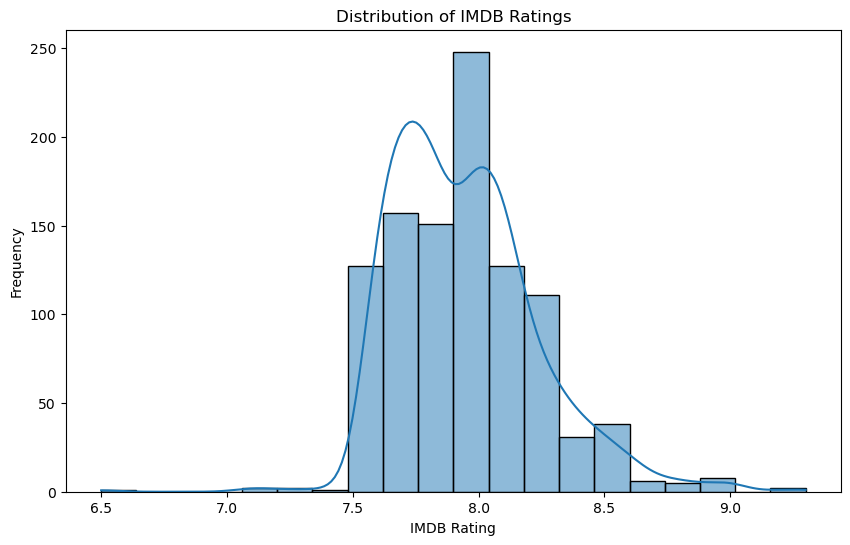

In [17]:
# 1. Distribution of IMDB Ratings
# Histogram for the distribution of IMDB Ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Rating'], kde=True, bins=20)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

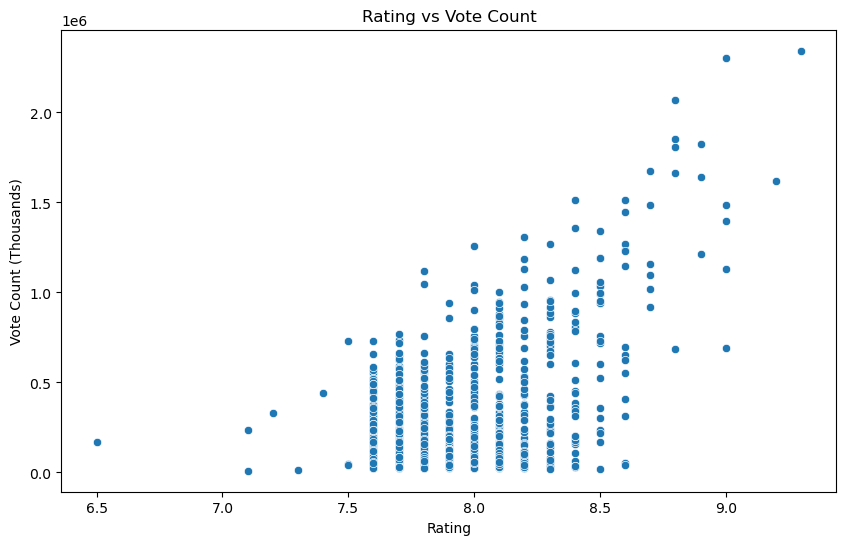

In [18]:
# 2. Relationship Between Rating and Vote Count
# Scatter plot for Rating and vote count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Vote Count', data=merged_df)
plt.title('Rating vs Vote Count')
plt.xlabel('Rating')
plt.ylabel('Vote Count (Thousands)')
plt.show()



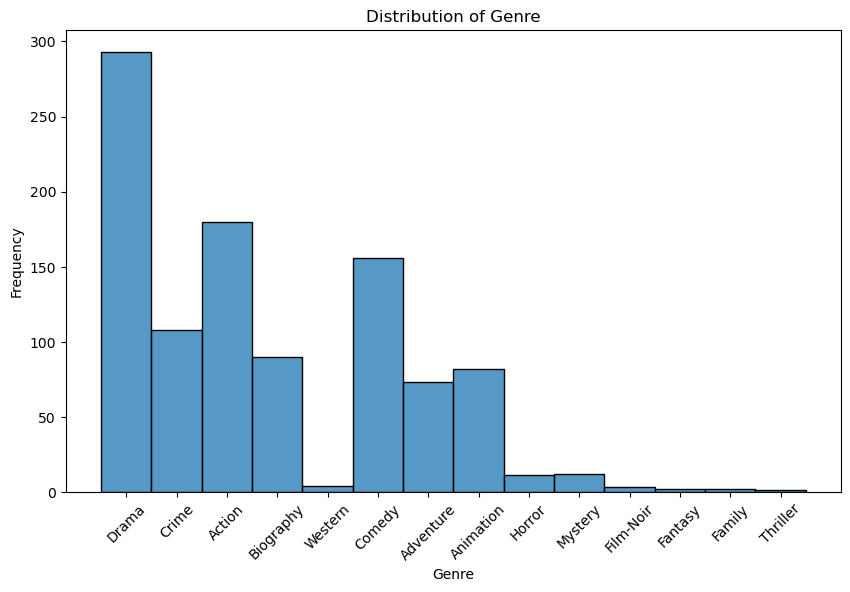

In [19]:
# 3. Histogram for the distribution of Genre
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Genre'],  bins=20)
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

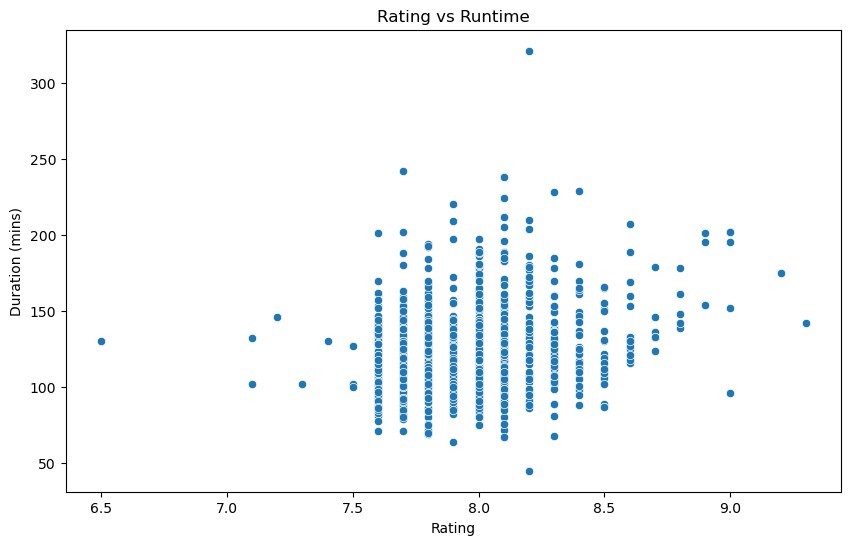

In [20]:
# 4. Relationship Between Runtime and Rating
# Scatter plot for Rating and Runtime
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Duration (mins)', data=merged_df)
plt.title('Rating vs Runtime')
plt.xlabel('Rating')
plt.ylabel('Duration (mins)')
plt.show()

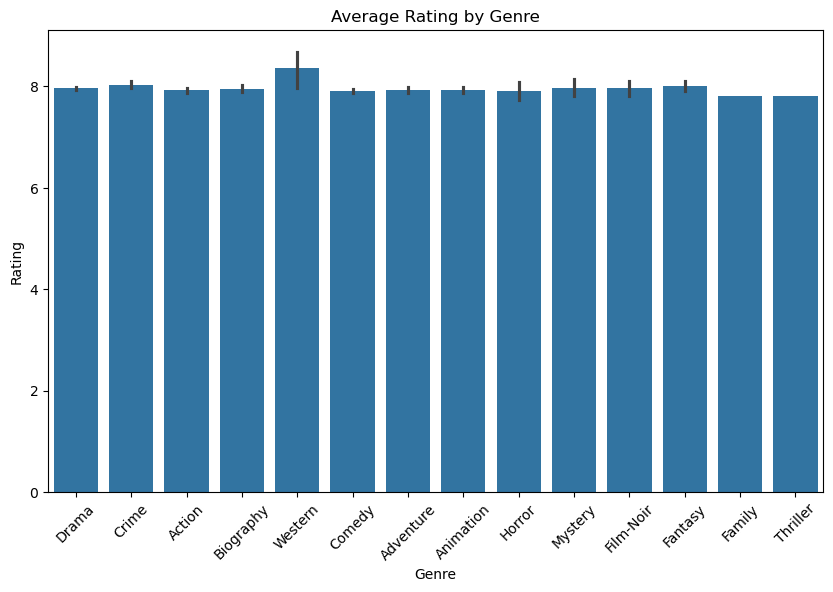

In [21]:
# 5. Genre vs Rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Rating', data=merged_df)
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # You can change the angle as needed
plt.show()

In [22]:
# Compute the correlation between runtime and IMDB rating
correlation = merged_df['Duration (mins)'].corr(merged_df['Rating'])
print(f'Correlation between runtime and IMDB rating: {correlation:.2f}')

# Optional: Perform a statistical test (e.g., Pearson correlation test) to assess significance
from scipy.stats import pearsonr

# Perform Pearson's correlation test
corr_coefficient, p_value = pearsonr(merged_df['Duration (mins)'], merged_df['Rating'])
print(f'Pearson correlation coefficient: {corr_coefficient:.2f}')
print(f'P-value: {p_value:.3f}')

# Interpret the p-value
if p_value < 0.05:
    print("The relationship between runtime and IMDB rating is statistically significant.")
else:
    print("The relationship between runtime and IMDB rating is not statistically significant.")

Correlation between runtime and IMDB rating: 0.25
Pearson correlation coefficient: 0.25
P-value: 0.000
The relationship between runtime and IMDB rating is statistically significant.
